# Creating Word Vectors with word2vec

#### Load Dependencis

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show,figure
%matplotlib inline

In [3]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tohid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

#### Load data

In [4]:
nltk.download("gutenberg")

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Tohid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

In [5]:
from nltk.corpus import gutenberg

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
len(gutenberg.fileids())

18

#### Tokenize text

In [10]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [12]:
# gberg_sent_tokens[0:5]

In [21]:
  word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [24]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [25]:
gberg_sents = gutenberg.sents()

In [31]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [33]:
gberg_sents[4][14]

'father'

In [34]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [35]:
len(gutenberg.words())

2621613

#### Run word2vec

In [36]:
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=2)

In [37]:
model.save("raw_gutenberg_model.w2v")

E:\Anaconda3\envs\tf\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


#### Explore model

In [40]:
model = gensim.models.Word2Vec.load("raw_gutenberg_model.w2v")

E:\Anaconda3\envs\tf\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [41]:
model['dog']

E:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.1857236 ,  0.27796888,  0.00083414,  0.15553471,  0.04109105,
        0.02176805,  0.32230857,  0.29313445, -0.28792378,  0.22679286,
       -0.05214208, -0.243524  ,  0.1489928 ,  0.21834253,  0.01526634,
       -0.20859842,  0.6217456 , -0.08994427,  0.00981246, -0.2054643 ,
        0.10673653, -0.34901673, -0.23419322, -0.18802707, -0.639469  ,
        0.19521862,  0.0128475 , -0.04161336,  0.16941556,  0.20385024,
        0.43931282, -0.51707315, -0.12340785,  0.21755949,  0.55013514,
        0.12068851, -0.10255907,  0.3665261 , -0.5517714 , -0.47296906,
        0.06173753,  0.32185706, -0.07696572,  0.03037049, -0.7396444 ,
       -0.2332441 ,  0.27404398,  0.30636892, -0.18111736,  0.00887536,
       -0.34345204, -0.36915612,  0.19861417, -0.0759106 , -0.09238965,
        0.2896439 ,  0.16227852, -0.3184413 , -0.61458385,  0.22018337,
       -0.07512596, -0.01039484,  0.0345187 , -0.57354915], dtype=float32)

In [52]:
# len(model["dog"])

In [51]:
# model.most_similar("dog")

In [50]:
# model.most_similar("think")

In [48]:
# model.most_similar("day")

In [49]:
# model.most_similar("father")

In [58]:
model.doesnt_match("mother father daughter dog".split())

E:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'dog'

In [59]:
model.similarity('father','dog')

E:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.46217325366752415

In [61]:
# model.most_similar(positive=['father','woman'],negative=['man'])

In [62]:
# model.most_similar(positive=['son','woman'],negative=['man'])

In [65]:
# model.most_similar(positive=['king','woman'],negative=['man'],topn=30)

#### Reduce word vector dimensionality with t-SNE

In [66]:
len(model.wv.vocab)

17011

In [73]:
X = model[model.wv.vocab]

E:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [74]:
tsne = TSNE(n_components=2,n_iter=1000)

In [76]:
# X_2d = tsne.fit_transform(X)

In [78]:
# coords_df = pd.DataFrame(X_2d,columns=['x','y'])
# coords_df["token"]=model.wv.vocab.keys()

In [ ]:
# coords_df.head()

In [80]:
# coords_df.to_csv('raw_gutenberg_tsne.csv',index=False)

#### Visualize 2D representation of word vectors

In [82]:
coords_df = pd.read_csv('clean_gutenberg_tsne.csv')

In [84]:
coords_df.head(20)

,x,y,token
0,-2.987932,2.185429,emma
1,-1.268544,-6.677685,by
2,-6.877790,-2.869497,jane
3,-3.827639,-2.040101,volume
4,-2.984125,-5.456696,i
5,3.631590,-6.151029,chapter
6,-1.222298,0.600622,handsome
7,-0.893768,-4.050982,clever
8,-1.260759,-6.656536,and
9,-0.300042,-2.848341,rich


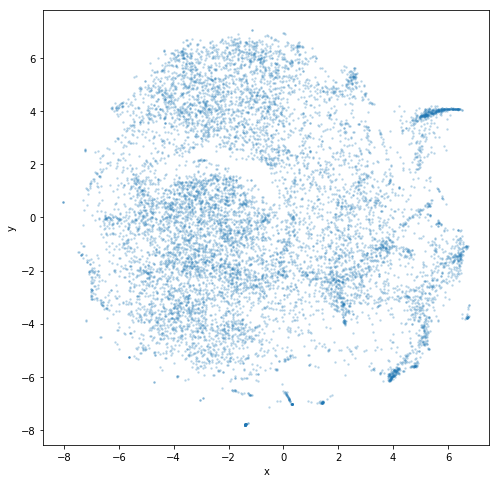

In [85]:
_ = coords_df.plot.scatter('x','y',figsize=(8,8),marker='.',s=10,alpha=0.2)

In [86]:
output_notebook()

Loading BokehJS ...

In [87]:
subset_df=coords_df.sample(5000)

In [90]:
p = figure(plot_width=600,plot_height=600)
_ = p.text(x=subset_df.x,y=subset_df.y,text=subset_df.token)

In [91]:
show(p)